# Project: Investigate a No-Show appointments Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
> The data includes info about the patient ID, visit ID, scheduled day, age, gender, neighbourhood, some diseases existance, received sms or not, showed up or not.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. 
> Expected Questions to answer through this **data analysis** will be as follow: 
Is existance of scholarship related somehow to no-show?
, Is gender and age related to no-show? how?
, Is alcoholism related to no-show?
, Is sms receiving affect the show? how?
, Is neighbourhood affects the show?

In [1]:
# Will import all libraries we will need through our analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
no_show=pd.read_csv('no_show_data.csv')
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Check for number of rows and columns.
no_show.shape

(110527, 14)

In [5]:
# will check for the data types, Nan values if exist
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This showed that no null values is exits, and found that the data types are suitable with what we need to do through the analysis.

In [6]:
# Need to check for the duplicates if any ...
no_show.duplicated().sum()

0

So, no duplicates need to be dropped.

In [7]:
# will check the non object columns statistically specially columns that should be either 0 or 1.
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This showed a problem with Age that there're values of -1 !! this rows should be dropped.
This showed a problem with Handcap that there're values of 4 !! this rows should be dropped.


### Data Cleaning
> According to above data's general properties .. we will need to perform the following cleaning:
1- drop the rows that has age equal or below 0.
2- drop the rows that has handcap values above 1.
3- need to change the No show column to avoid miss understanding to 0 if yes 'no-show' , 1 if no 'show'.
4- will also need to drop the irrelevant data to the analysis (Appointment ID, Scheduled Day, Appointment Day)
5- will lower case all column names and replace '-' in no-show to '_'
6- change patient id column type to avoid any problems while analysis.
 

In [8]:
# 1- drop irrelevant columns of data which isn't useful while analysis.

no_show.drop(columns=['AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
no_show.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# 2- lower case all column names and replace space and hyphen to underscore.
col=np.array(no_show.columns)
new_col=[]
for col in col:
        new_col.append(col.lower().replace(' ', '_').replace('-', '_'))
        
no_show.columns= new_col

In [10]:
# confirm the above header changes saved.
no_show.head(3)               # Every thing is okay.

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [11]:
# 3- change column 'patientid' type to string.
no_show['patientid']= no_show['patientid'].astype(str)

In [12]:
no_show.info()  # To confirm that changes took place.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
patientid        110527 non-null object
gender           110527 non-null object
age              110527 non-null int64
neighbourhood    110527 non-null object
scholarship      110527 non-null int64
hipertension     110527 non-null int64
diabetes         110527 non-null int64
alcoholism       110527 non-null int64
handcap          110527 non-null int64
sms_received     110527 non-null int64
no_show          110527 non-null object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


In [13]:
# 4- Let's drop the rows that has age below or equal 0 as this is nonsense.
idx= no_show.query('age <= 0').index   # found huge number with age 0 which maybe wrong data entry.
no_show.drop(index=idx, inplace=True)

In [14]:
# Confirm the rows was removed.
no_show.shape       #number of rows decreases to a lower value.

(106987, 11)

In [15]:
# 5- Let's drop the rows that has handcap column above 1.
indx= no_show.query('handcap > 1').index        #determine index of rows with handcap above 1.
no_show.drop(index=indx, inplace= True, axis=0)

In [16]:
# Confirm the new rows was removed.
no_show.shape     # confirmed they were removed.

(106788, 11)

In [17]:
# Confirm statistically for the typo data.
no_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# 6- change the No show column to avoid miss understanding to 'no_show' if yes , 'show' if no. 
no_show['no_show'].unique()  # first will check the values in this column

array(['No', 'Yes'], dtype=object)

In [19]:
# will replace the yes and no values with the show or no show for clear understanding.
no_show['no_show']=no_show['no_show'].replace('No', 'show').replace('Yes', 'no_show')

In [20]:
# 7- will change the sms_received column to sms or no_sms for better understanding.
# we will need to change its type from int to string first to be able to make these changes.
no_show['sms_received']=no_show['sms_received'].astype(str)
no_show['sms_received']=no_show['sms_received'].replace('0', 'no_sms').replace('1', 'sms')

In [21]:
no_show.head(2)    #confirm that the no_show column data changed properly.

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,F,62,JARDIM DA PENHA,0,1,0,0,0,no_sms,show
1,558997776694438.0,M,56,JARDIM DA PENHA,0,0,0,0,0,no_sms,show


In [22]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106788 entries, 0 to 110526
Data columns (total 11 columns):
patientid        106788 non-null object
gender           106788 non-null object
age              106788 non-null int64
neighbourhood    106788 non-null object
scholarship      106788 non-null int64
hipertension     106788 non-null int64
diabetes         106788 non-null int64
alcoholism       106788 non-null int64
handcap          106788 non-null int64
sms_received     106788 non-null object
no_show          106788 non-null object
dtypes: int64(6), object(5)
memory usage: 9.8+ MB


In [23]:
# will save the cleaned data to a csv file in case needed elsewhere for processing and analysis.
no_show.to_csv('no_show_data_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> Is existance of scholarship related somehow to no-show?
, Is gender and age related to no-show? how?
, Is alcoholism related to no-show? diabetes? hipertension? handcap? all of them together?
, Is sms receiving affect the show? how?
, Is neighbourhood poor or not depending on scholarships and how this affects the show?


### Research Question 1 (Is receiving sms affects attending appointments ?)

In [24]:
no_show.head(4)   #To have a copy of the dataset as a reference in the next analyses.

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,F,62,JARDIM DA PENHA,0,1,0,0,0,no_sms,show
1,558997776694438.0,M,56,JARDIM DA PENHA,0,0,0,0,0,no_sms,show
2,4262962299951.0,F,62,MATA DA PRAIA,0,0,0,0,0,no_sms,show
3,867951213174.0,F,8,PONTAL DE CAMBURI,0,0,0,0,0,no_sms,show


In [25]:
# study the people who received sms and not and this effect on attending statistically.
no_show.groupby(['no_show', 'sms_received'])['no_show'].count()

no_show  sms_received
no_show  no_sms          12080
         sms              9559
show     no_sms          60170
         sms             24979
Name: no_show, dtype: int64

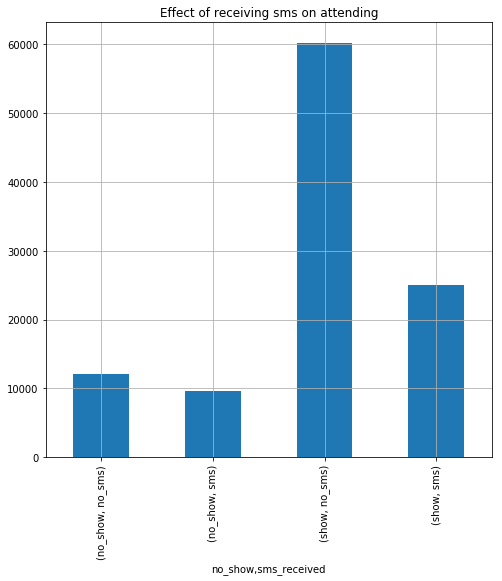

In [26]:
# study the people who received sms and not and this effect on attending by plots.
no_show.groupby(['no_show','sms_received'])['no_show'].count().plot(kind='bar', grid=True, title='Effect of receiving sms on attending', figsize= (8,8));

This showed that for the people who attended their appointment; most of them didn't receive sms. This confirmed that the sms doesn't affect the show of patients.
Although, for the people who didn't attend their appointments; the numbers aren't too far from each other that confirm the above state.

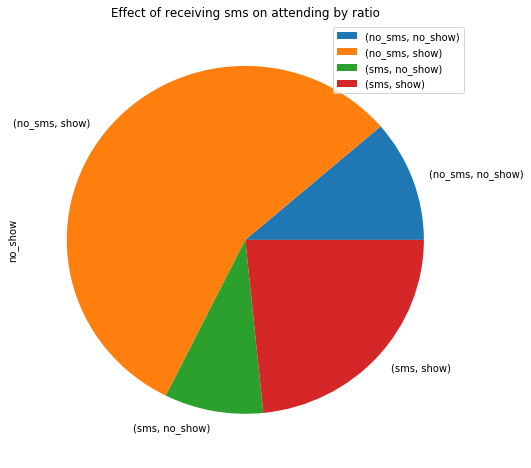

In [27]:
# to check with the proportions instead of numbers which will make more sense.
sms=no_show.groupby(['sms_received', 'no_show'])['no_show'].count()/no_show.shape[0]
sms.plot(kind='pie', legend=True, figsize=(8,8), title='Effect of receiving sms on attending by ratio');

This Pie Chart proved that the largest percentage of people attended their appointments are from people who didn't receive sms.

### Research Question 2  (Which mix of gender and age most likely not to attend their appointments?)

In [28]:
# will use a double variable exploration to find the mix of gender and age that most likely not to attend.
no_show.query('no_show == no_show').groupby(['gender', 'age'])[['patientid']].count().max()

patientid    1185
dtype: int64

In [29]:
# will first try to explore data to find the gender that most likely not to attend.
tot =  no_show.query('no_show == no_show').groupby('gender')[['patientid']].count().sum()
mix=no_show.query('no_show == no_show').groupby('gender')[['patientid']].count() / tot # search for gender?

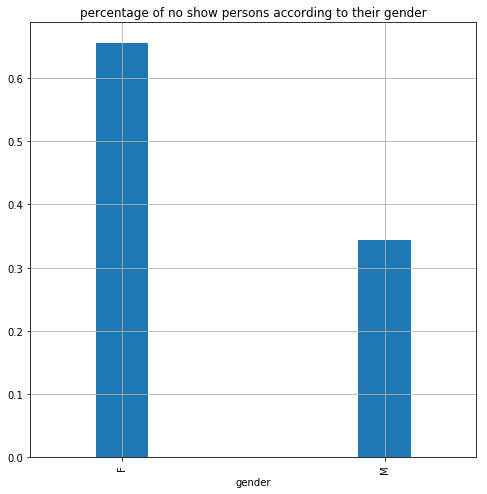

In [30]:
# Plotting the percentage of persons not attended their appointments vs their sex.
mix.plot(kind='bar', width=0.2, figsize=(8,8), title='percentage of no show persons according to their gender', legend=False, grid=True);

This statistical & graphical calculations showed that females are more likely not to attend their appointments with around 66% of total people not showed.

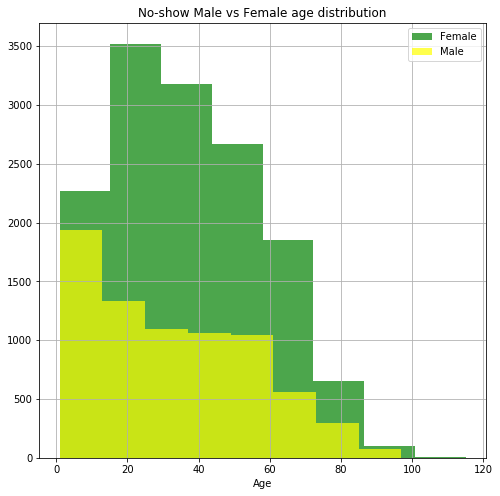

In [31]:
#Check distribution of age of no show people.
no_show[(no_show['no_show'] == 'no_show') & (no_show['gender'] == 'F')]['age'].hist(bins=8, figsize=(8,8), color= 'green', alpha=0.7, label= 'Female');
no_show[(no_show['no_show'] == 'no_show') & (no_show['gender'] == 'M')]['age'].hist(bins=8, figsize=(8,8), color= 'yellow', alpha=0.7, label= 'Male');
plt.legend();
plt.title('No-show Male vs Female age distribution');
plt.xlabel('Age');
plt.show();

This showed that the majority of no-show females ranged between 15-30 but the majority of no show males ranged between 1-10.

### Research Question 3  (Is Scholarship affects attendance or not?)

In [32]:
# Will show first rows of data to check same.
no_show.head(2)

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,F,62,JARDIM DA PENHA,0,1,0,0,0,no_sms,show
1,558997776694438.0,M,56,JARDIM DA PENHA,0,0,0,0,0,no_sms,show


no_show  scholarship
no_show  0              19069
         1               2570
Name: scholarship, dtype: int64


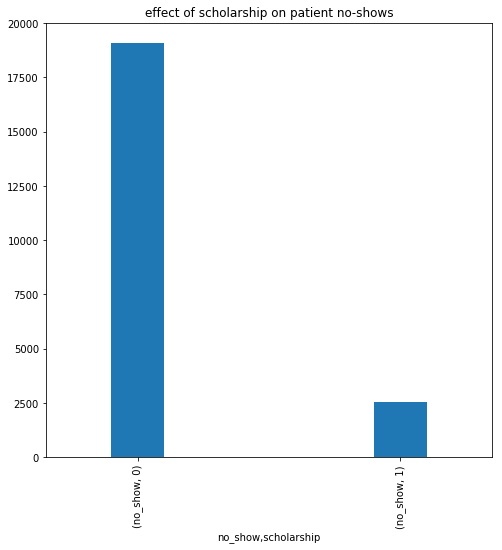

In [33]:
# will show the number of no show and their scholarship status ...
analysis= no_show[no_show['no_show'] == 'no_show'].groupby('no_show')['scholarship'].value_counts()
print(analysis)
analysis.plot(kind='bar', width= 0.2, title='effect of scholarship on patient no-shows', figsize=(8,8));

This shows that the Scholarship existance affect the attendance for the appointment as the people not attended has no scholarship. So, the people with no scholarships are more expected not to attend their appointments.

no_show  scholarship
show     0              76928
         1               8221
Name: scholarship, dtype: int64


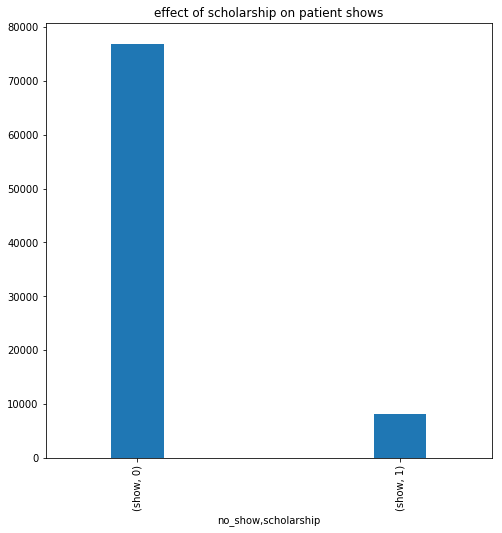

In [34]:
# will show the number of show and their scholarship status ...
analysis1= no_show[no_show['no_show'] == 'show'].groupby('no_show')['scholarship'].value_counts()
print(analysis1)
analysis1.plot(kind='bar', width=0.2, title='effect of scholarship on patient shows', figsize=(8,8));

This showed that the most people who attended their appointments don't have a scholarship!!! 

### Research Question 4  (Is Neighborhood affects attendance or not?)

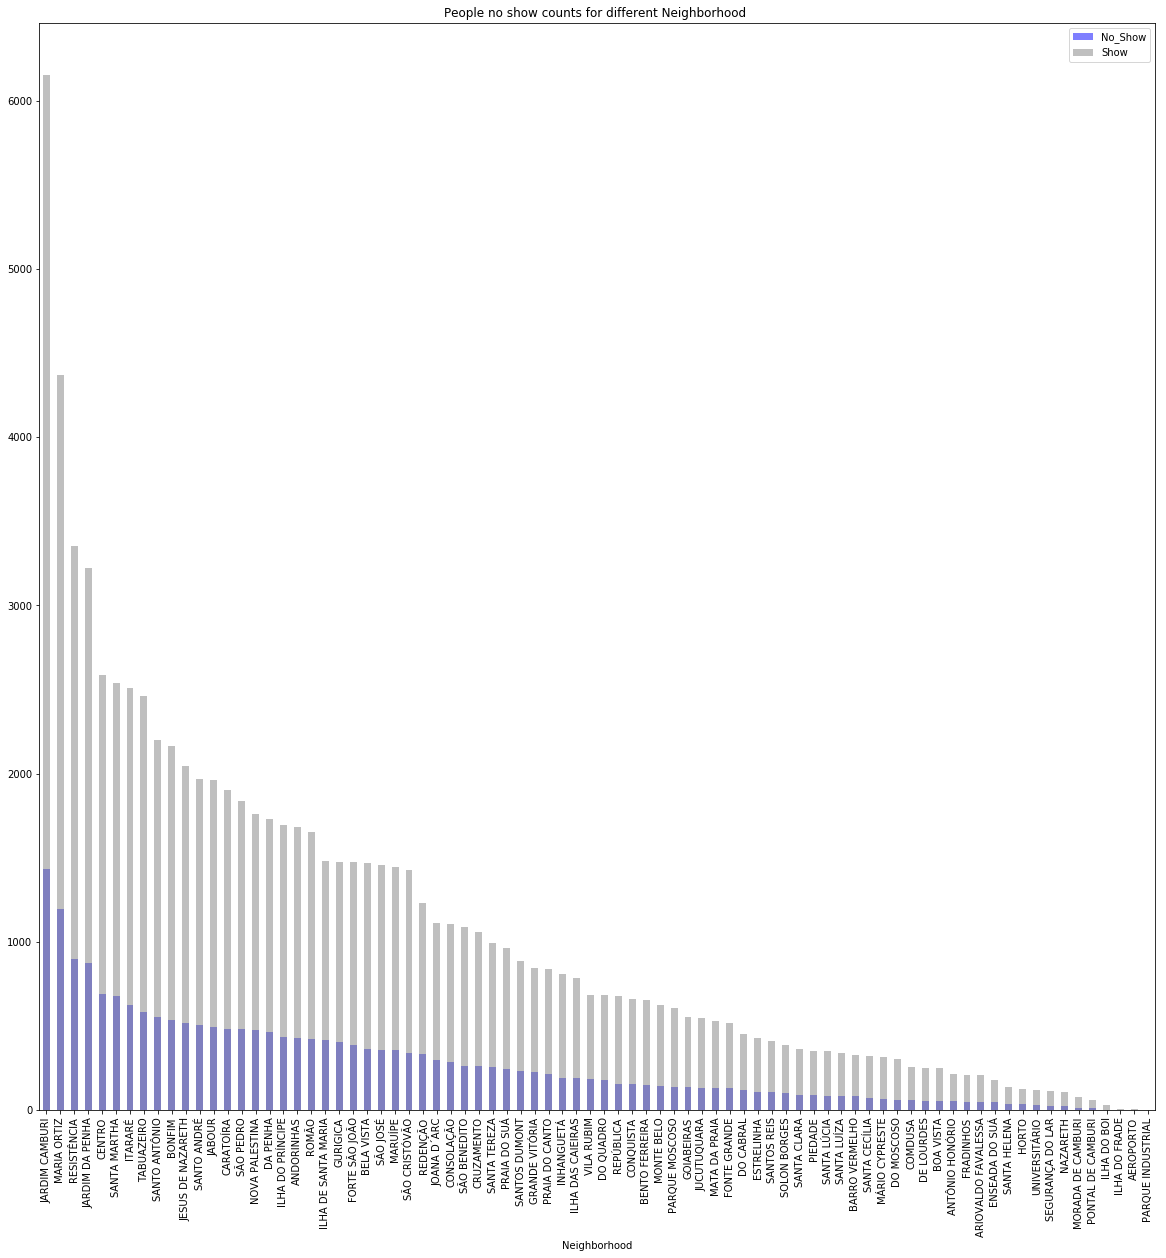

In [38]:
no_show[no_show['no_show'] == 'no_show']['neighbourhood'].value_counts().plot(kind='bar', figsize= (20,20), title='People no show counts for different Neighborhood ', color= 'blue', alpha=0.5, label='No_Show');
no_show[no_show['no_show'] == 'show']['neighbourhood'].value_counts().plot(kind='bar', figsize= (20,20), title='People no show counts for different Neighborhood ', color='grey', alpha=0.5, label='Show');
plt.xlabel('Neighborhood')
plt.legend();
plt.show()

This showed that some neighberhood shows a huge number of shows. In first place is Jardim Camburi then Maria Ortiz.

<a id='conclusions'></a>
## Conclusions

> According to the Above analyses; we will find the following:

> 1- There's no significant relationship between receiving sms and attending the appointment as it's not like expected, the no. of people attended without receiving sms is higher than those who attended with receiving sms!

> 2- Areas like Jardim Camburi, Maria Ortiz showed the most shows.

> 3- Regarding the scholarships; for the people not attended their appoimtments, most of them didn't have a scholarship. But not like what expected, the majority of people who attaneded their appointment don't have a scholarship which is strange.

> 4- The percentage of females is higher for no show. Also, the major females who don't attend their appointments are between 15 and 30 years. The major of males who don't attend their appointments are between 0-10 years old.


### Limitations
> The information supplied in the dataset isn't inclusive enough to show a detailed relatoinship between the show status and the other factors. like the neighborhood; It showed the areas but we never knew the reasons for which some areas shows higher attending number. It may be due to distance to the medical centers or it may be due to high population in these areas. we will never know!


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255